
    
<b> Domain: </b> Cyber Security

Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks. These cyberattacks are usually aimed at accessing, changing, or destroying sensitive information; extorting money from users; or interrupting normal business processes.Implementing effective cybersecurity measures is particularly challenging today because there are more devices than people, and attackers are becoming more innovative.
With an increasing number of users, devices and programs in the modern enterprise, combined with the increased deluge of data (much of which is sensitive or confidential) the importance of cybersecurity continues to grow. The growing volume and sophistication of cyber attackers and attack techniques compound the problem even further.The cyber threat landscape and cybersecurity both change quickly, and this has been particularly true recently. Significant modifications in corporate business operations and IT architectures were prompted by the COVID-19 outbreak. Cyber threat actors have taken advantage of these changes, targeting their attacks toward vulnerabilities in remote access, cloud computing, and other solutions adopted as part of the new security reality.

As the cyber threat landscape evolves, many corporate security teams are struggling to keep up with attacks that are growing more common and sophisticated. Threats such as ransomware infections, supply chain attacks, and multi-vector attacks are on the rise, and sophisticated attacks like the exploit of the Log4j vulnerability impact millions of companies, including Amazon, Cisco, and Tesla.

In [2]:
pip install spacy

     --------------------------------------- 11.9/11.9 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyLDAvis

     ---------------------------------------- 1.7/1.7 MB 3.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=fde88669e80328cbbe2dff3fe44172daa6de177e3133e30c698ea97a7f588817
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=33610f8

In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


<b> Importing Packages: </b>

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Dell\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


<b> Preparation of Stopwords: </b>

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [192]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['cyber', 'cyber security','cybersecurity','however','et','al', 'may', 'from', 'subject', 're', 'edu', 'use','U.S.','also','research','time','much','scientist','researcher','say','year','well','due','per_cent','percent','author','per _cent','65','2019'])

<b> Importing Dataset: </b>

In [68]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Nikitha\\2128240_Nikitha_TSMA.csv")
#df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Nikitha\\2128240_Nikitha_TSMA.csv",encoding="ISO-8859-1")

In [50]:
df

,Article
0,The integration of computing and communication...
1,There is a wealth of information security guid...
2,"In recent times, there have been attempts to l..."
3,The recent digital revolution led robots to be...
4,Deep learning derived from an artificial neura...
5,"To combat cyber threats in the smart grid, an ..."
6,We live in a time when data security has becom...
7,"At present, most of the economic, commercial, ..."
8,Cybersecurity is increasingly becoming a promi...
9,The aim of the researcher was to determine the...


<b> Removing New line characters: </b>

In [51]:
# Convert to list
data = df.Article.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove numbers
data = [re.sub('\d+', ' ', sent) for sent in data]

<b> Tokenization of Words and Cleaning of text: </b>

In [52]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['the', 'integration', 'of', 'computing', 'and', 'communication', 'capabilities', 'with', 'the', 'power', 'grid', 'has', 'led', 'to', 'numerous', 'vulnerabilities', 'in', 'the', 'cyber', 'physical', 'system', 'cps', 'this', 'cyber', 'security', 'threat', 'can', 'significantly', 'impact', 'the', 'physical', 'infrastructure', 'economy', 'and', 'society', 'in', 'traditional', 'it', 'environments', 'there', 'are', 'already', 'abundant', 'attack', 'cases', 'demonstrating', 'that', 'unauthorized', 'users', 'have', 'the', 'capability', 'to', 'access', 'and', 'manipulate', 'sensitive', 'data', 'from', 'protected', 'network', 'domain', 'electric', 'power', 'grids', 'have', 'also', 'heavily', 'adopted', 'information', 'technology', 'it', 'to', 'perform', 'real', 'time', 'control', 'monitoring', 'and', 'maintenance', 'tasks', 'in', 'sophisticated', 'cyber', 'attack', 'targeted', 'ukrainian', 'power', 'grid', 'causing', 'wide', 'area', 'power', 'outages', 'it', 'highlights', 'the', 'importance', 

<b> Creating Bigram and Trigram Models: </b>

In [53]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'integration', 'of', 'computing', 'and', 'communication', 'capabilities', 'with', 'the', 'power_grid', 'has', 'led', 'to', 'numerous', 'vulnerabilities', 'in', 'the', 'cyber', 'physical', 'system', 'cps', 'this', 'cyber', 'security', 'threat', 'can', 'significantly', 'impact', 'the', 'physical', 'infrastructure', 'economy', 'and', 'society', 'in', 'traditional', 'it', 'environments', 'there', 'are', 'already', 'abundant', 'attack', 'cases', 'demonstrating', 'that', 'unauthorized', 'users', 'have', 'the', 'capability', 'to', 'access', 'and', 'manipulate', 'sensitive', 'data', 'from', 'protected', 'network', 'domain', 'electric', 'power', 'grids', 'have', 'also', 'heavily', 'adopted', 'information', 'technology', 'it', 'to', 'perform', 'real_time', 'control', 'monitoring', 'and', 'maintenance', 'tasks', 'in', 'sophisticated', 'cyber', 'attack', 'targeted', 'ukrainian', 'power_grid', 'causing', 'wide', 'area', 'power', 'outages', 'it', 'highlights', 'the', 'importance', 'of', 'inv

In [54]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

<b> Removal of Stopwords, Making Bigrams and Lemmatization: </b>

In [16]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl

     --------------------------------------- 12.8/12.8 MB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
df=pd.DataFrame(data_lemmatized)
df.to_csv('processed_data.csv')

<b> Creation of the Dictionary and Corpus needed for Topic Modeling: </b>

In [56]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 2), (29, 1), (30, 3), (31, 1), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1), (37, 21), (38, 5), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 3), (48, 2), (49, 3), (50, 1), (51, 2), (52, 1), (53, 2), (54, 3), (55, 1), (56, 3), (57, 2), (58, 3), (59, 1), (60, 4), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 16), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 2), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 3), (87, 4), (88, 1), (89, 4), (90, 1), (91, 4), (92, 2), (93, 3), (94, 1), (95, 1), (96, 4), (97, 1), (98, 2), (99, 1), (100, 2), (101, 1), (102, 3), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 

In [57]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 1),
  ('able', 1),
  ('abnormal', 1),
  ('absence', 1),
  ('abundant', 1),
  ('accept', 1),
  ('access', 5),
  ('accessible', 1),
  ('account', 1),
  ('accuracy', 1),
  ('accurate', 1),
  ('achieve', 1),
  ('acquire', 1),
  ('action', 1),
  ('activity', 1),
  ('actual', 1),
  ('addition', 1),
  ('address', 2),
  ('adopt', 1),
  ('adss', 3),
  ('advanced', 1),
  ('affect', 1),
  ('alarm', 1),
  ('allow', 1),
  ('already', 1),
  ('analysis', 2),
  ('analyze', 1),
  ('anomaly', 2),
  ('anomaly_detection', 2),
  ('apply', 1),
  ('approach', 3),
  ('approximately', 1),
  ('area', 3),
  ('art', 3),
  ('assess', 1),
  ('assessment', 1),
  ('asset', 1),
  ('attack', 21),
  ('attacker', 5),
  ('authentication', 2),
  ('authorize', 1),
  ('automate', 2),
  ('automation', 1),
  ('available', 1),
  ('back', 1),
  ('backbone', 1),
  ('base', 3),
  ('become', 3),
  ('block', 2),
  ('breaker', 3),
  ('build', 1),
  ('bypass', 2),
  ('calculate', 1),
  ('call', 2),
  ('capability', 3),
 

<b> Building the topic model: </b>

In [111]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=50,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

<b> Viewing the topics in LDA model: </b>

In [112]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"security" + 0.010*"information" + 0.009*"employee" + 0.009*"system" '
  '+ 0.009*"user" + 0.008*"fatigue" + 0.007*"human" + 0.005*"behavior" + '
  '0.005*"focus" + 0.005*"organization"'),
 (1,
  '0.021*"security" + 0.016*"system" + 0.011*"network" + 0.011*"datum" + '
  '0.010*"base" + 0.010*"use" + 0.010*"attack" + 0.007*"information" + '
  '0.006*"model" + 0.005*"method"'),
 (2,
  '0.023*"attack" + 0.015*"security" + 0.008*"system" + 0.008*"game" + '
  '0.008*"use" + 0.007*"datum" + 0.007*"attacker" + 0.006*"device" + '
  '0.005*"information" + 0.005*"target"'),
 (3,
  '0.017*"security" + 0.012*"system" + 0.008*"use" + 0.006*"technology" + '
  '0.006*"robot" + 0.006*"information" + 0.006*"threat" + 0.006*"attack" + '
  '0.005*"include" + 0.005*"robotic"')]


<b> Compute Model Perplexity and Coherence Score: </b>

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is

In [113]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.37881177622224

Coherence Score:  0.2732750868371213


<b>Visualization of the topics-keywords: </b>

In [114]:
# Visualize the topics
%matplotlib inline
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis
#p = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda.html')
#The larger the bubble, the more frequent is the topic in the documents

C:\Users\Dell\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


<b>  Wordcloud of Top N words in each topic: </b>

In [24]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


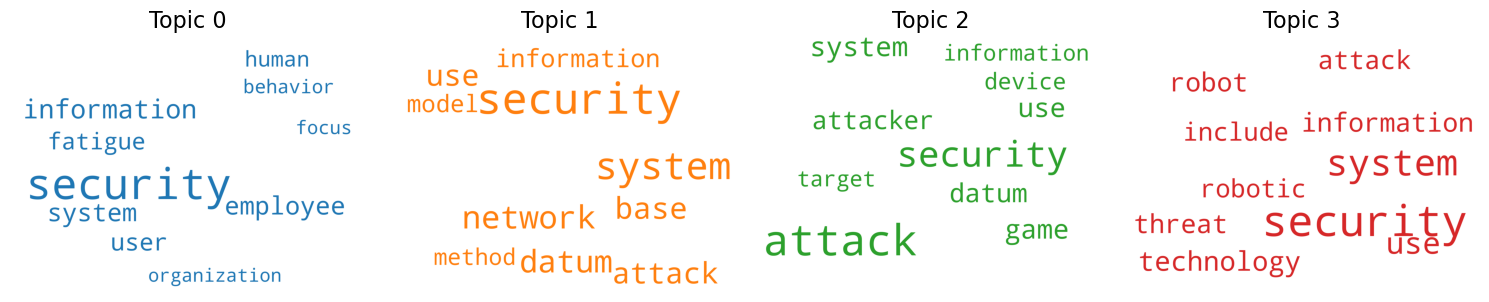

In [191]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


# Method 2 - To find out which article belongs to which topic

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

In [194]:
dtm = cv.fit_transform(df['Article'])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['_cent', 'per', 'security'] not in stop_words.
  warnings.warn(


In [195]:
dtm

<44x4359 sparse matrix of type '<class 'numpy.int64'>'
	with 29271 stored elements in Compressed Sparse Row format>

In [196]:
from sklearn.decomposition import LatentDirichletAllocation

In [197]:
LDA = LatentDirichletAllocation(n_components=4,random_state=100)

In [198]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=100)

In [199]:
len(cv.get_feature_names_out())

4359

In [200]:
cv.get_feature_names_out()[4000]

'theoretical'

In [201]:
import random

In [202]:
for i in range(10):
    random_word_id = random.randint(0,4359)
    print(cv.get_feature_names()[random_word_id])

searches
affects
personal
despite
meta
air
leveraging
highest
right
action


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [203]:
len(LDA.components_)

4

In [204]:
LDA.components_

array([[ 4.26268042,  0.25048954, 19.92136182, ...,  3.24997122,
         2.25000698,  0.25154963],
       [ 5.13108789,  5.2496295 ,  2.7063216 , ...,  0.25020295,
         0.25000094,  3.24770353],
       [ 0.25452411,  0.25000036, 23.24410564, ...,  2.33394598,
         1.24999163,  0.25088988],
       [ 1.35170758,  1.2498806 ,  4.12821094, ...,  4.16587985,
         0.25000044,  2.24985696]])

In [205]:
LDA.components_.shape

(4, 4359)

In [206]:
single_topic = LDA.components_[0]

In [207]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([1214, 2754,  536, ..., 3932,  472, 3720], dtype=int64)

In [209]:
# Word least representative of this topic
single_topic[1214]

0.2500001004297589

In [211]:
# Word most representative of this topic
single_topic[3720]

163.81164124387536

In [212]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([ 584, 3484, 4019,  784,  467, 3935, 2742, 3932,  472, 3720],
      dtype=int64)

In [213]:
top_word_indices = single_topic.argsort()[-10:]

In [214]:
#all documents frequently occured words
for index in top_word_indices:
    print(cv.get_feature_names()[index])

blockchain
risk
threats
cloud
attack
systems
network
system
attacks
smart


In [215]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['devices', 'using', 'city', 'iot', 'technology', 'blockchain', 'risk', 'threats', 'cloud', 'attack', 'systems', 'network', 'system', 'attacks', 'smart']


THE TOP 15 WORDS FOR TOPIC #1
['modeling', 'network', 'model', 'techniques', 'intelligent', 'attack', 'artificial', 'intelligence', 'industrial', 'construction', 'learning', 'ai', 'system', 'attacks', 'systems']


THE TOP 15 WORDS FOR TOPIC #2
['behavior', 'training', 'different', 'applications', 'robotic', 'study', 'standards', 'knowledge', 'iot', 'network', 'system', 'robots', 'deep', 'systems', 'learning']


THE TOP 15 WORDS FOR TOPIC #3
['organisations', 'proposed', 'healthcare', 'model', 'users', 'user', 'attack', 'ai', 'smart', 'detection', 'network', 'systems', 'human', 'attacks', 'system']




In [216]:
dtm.shape

(44, 4359)

In [217]:
topic_results = LDA.transform(dtm)

In [218]:
topic_results.shape

(44, 4)

In [219]:
topic_results[0] #index number of the word

array([3.31543893e-01, 3.38803663e-04, 3.35593866e-04, 6.67781709e-01])

In [220]:
topic_results[0].round(2)  #which topic has the highest probability for the articles

array([0.33, 0.  , 0.  , 0.67])

In [221]:
topic_results[0].argmax()

3

In [222]:
df.head(10)

,Article,Topic
0,The integration of computing and communication...,0
1,There is a wealth of information security guid...,0
2,"In recent times, there have been attempts to l...",3
3,The recent digital revolution led robots to be...,1
4,Deep learning derived from an artificial neura...,1
5,"To combat cyber threats in the smart grid, an ...",0
6,We live in a time when data security has becom...,0
7,"At present, most of the economic, commercial, ...",2
8,Cybersecurity is increasingly becoming a promi...,4
9,The aim of the researcher was to determine the...,4


In [223]:
topic_results.argmax(axis=1)

array([3, 2, 3, 2, 2, 3, 0, 0, 3, 1, 1, 0, 3, 1, 2, 3, 2, 0, 3, 2, 0, 0,
       2, 3, 3, 1, 0, 1, 2, 1, 3, 0, 3, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 3],
      dtype=int64)

In [224]:
df['Topic'] = topic_results.argmax(axis=1)

In [225]:
df.head(10)

,Article,Topic
0,The integration of computing and communication...,3
1,There is a wealth of information security guid...,2
2,"In recent times, there have been attempts to l...",3
3,The recent digital revolution led robots to be...,2
4,Deep learning derived from an artificial neura...,2
5,"To combat cyber threats in the smart grid, an ...",3
6,We live in a time when data security has becom...,0
7,"At present, most of the economic, commercial, ...",0
8,Cybersecurity is increasingly becoming a promi...,3
9,The aim of the researcher was to determine the...,1


# THANK YOU!